In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from os.path import join
from sklearn import tree
from amhelpers.config_parsing import load_config
from sklearn.tree import plot_tree
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics.pairwise import euclidean_distances
import graphviz
from sklearn.tree import export_graphviz

from inpole.pipeline import load_best_pipeline, load_experiment_pipeline
from inpole.data import get_data_handler_from_config
from inpole.models.utils import expects_groups
from inpole.visualization import *
from inpole.models.models import *
from inpole.data.utils import get_feature_names

/opt/conda/envs/inpole_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.rcParams.update(
    {
        'text.usetex': True,
        'font.family': 'serif',
        'font.serif': ['Computer Modern Roman'],
        'font.size': 15,
        'legend.fontsize': 12,
        'axes.titlesize': 15,
        #'legend.title_fontsize': 10
    }
)

# RA

In [3]:
switch_results_path = '/mimer/NOBACKUP/groups/inpole/results/switch/'
experiment_path1= '20240325_2153_sweep' 
experiment_path2 = '20240326_1513_sweep'

In [4]:
switch_scores_path = join(join(switch_results_path, experiment_path1), 'scores.csv')
switch_scores = pd.read_csv(switch_scores_path)

In [5]:
switch_scores

,trial,exp,estimator_name,subset,accuracy,auc,ece,brier
0,1,riskslim_02,riskslim,valid,0.857365,0.847853,0.171606,0.144255
1,1,riskslim_02,riskslim,test,0.852755,0.845482,0.172208,0.147538
2,1,mlp_02,mlp,valid,0.858228,0.871710,0.023012,0.106276
3,1,mlp_02,mlp,test,0.855186,0.868826,0.026659,0.110194
4,1,lr_01,lr,valid,0.859608,0.861011,0.011516,0.108000
5,1,lr_01,lr,test,0.854891,0.858833,0.012531,0.111011
6,1,dt_02,dt,valid,0.861186,0.867838,0.004805,0.105758
7,1,dt_02,dt,test,0.855628,0.864852,0.007614,0.109554
8,1,pronet_02,pronet,valid,0.860668,0.868064,0.006137,0.106381
9,1,pronet_02,pronet,test,0.855554,0.865984,0.006798,0.109680


### RISKSLIM

In [6]:
riskslim_pipelines = load_best_pipeline(join(switch_results_path, experiment_path1), trial = 4, estimator_name = 'riskslim')
riskslim_preprocessor, riskslim = riskslim_pipelines.named_steps.values()

In [7]:
riskslim.__dict__

{'max_coefficient': 3,
 'max_L0_value': 6,
 'max_offset': 50,
 'c0_value': 1e-06,
 'w_pos': 4,
 'random_state': 902536945,
 'settings': {'c0_value': 1e-06,
  'w_pos': 4,
  'max_runtime': 30.0,
  'max_tolerance': 2.220446049250313e-16,
  'display_cplex_progress': True,
  'loss_computation': 'fast',
  'round_flag': True,
  'polish_flag': True,
  'chained_updates_flag': True,
  'add_cuts_at_heuristic_solutions': True,
  'initialization_flag': True,
  'init_max_runtime': 120.0,
  'init_max_coefficient_gap': 0.49,
  'cplex_randomseed': 902536945,
  'cplex_mipemphasis': 0},
 'intercept_': 0.0,
 'coef_': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.

In [8]:
print(riskslim.__dict__['risk_list'])

+---------------------------------------------+-------------------+-----------+
| Pr(Y = +1) = 1.0/(1.0 + exp(-(0 + score))   |                   |           |
| =========================================== | ================= | ========= |
| prev_action_switch                          |          2 points |   + ..... |
| cdai_4.0                                    |          1 points |   + ..... |
| prev_action_agg_switch                      |          1 points |   + ..... |
| ccp_agg_Not tested                          |         -1 points |   + ..... |
| prev_action_stay                            |         -1 points |   + ..... |
| pregnant_current                            |         -1 points |   + ..... |
| =========================================== | ================= | ========= |
| ADD POINTS FROM ROWS 1 to 6                 |             SCORE |   = ..... |
+---------------------------------------------+-------------------+-----------+


In [9]:
# Find encoder
column_transformer = riskslim_preprocessor.named_steps['column_transformer']

num_transformer = column_transformer.named_transformers_['numerical_transformer']
encoder = num_transformer.named_steps['encoder']

In [10]:
# Find the boundaries of the feature's bins
bin_edges = encoder.bin_edges_
for i, edges in enumerate(bin_edges):
    print(f" Box boundaries of Feature {i}: {edges}")

 Box boundaries of Feature 0: [18. 53. 61. 67. 74. 94.]
 Box boundaries of Feature 1: [2012. 2013. 2015. 2017. 2019. 2021.]
 Box boundaries of Feature 2: [ 0.  5.  9. 14. 22. 77.]
 Box boundaries of Feature 3: [13.13592052 23.81440353 26.98188972 29.92948151 34.45098114 79.90823364]
 Box boundaries of Feature 4: [  0. 115. 122. 130. 141. 250.]
 Box boundaries of Feature 5: [  0.  69.  74.  80.  84. 801.]
 Box boundaries of Feature 6: [  0.   5.  15.  35.  60. 100.]
 Box boundaries of Feature 7: [  0.   5.  20.  40.  65. 100.]
 Box boundaries of Feature 8: [ 0.          1.5         4.          8.         15.10000038 74.5       ]
 Box boundaries of Feature 9: [0.         2.01560903 2.87231202 3.04031383 3.91166902 8.95593548]
 Box boundaries of Feature 10: [13.13592052 23.81440353 26.98188972 29.92948151 34.45098114 79.90823364]
 Box boundaries of Feature 11: [  0. 115. 122. 130. 141. 250.]
 Box boundaries of Feature 12: [  0.  69.  74.  80.  84. 801.]
 Box boundaries of Feature 13: [  0

### RuleFit

In [11]:
rulefit_pipelines = load_best_pipeline(join(switch_results_path, experiment_path1), trial = 1, estimator_name = 'rulefit')
rulefit_pipelines[:-1].get_feature_names_out()

array(['numerical_transformer__age', 'numerical_transformer__year',
       'numerical_transformer__duration_ra',
       'numerical_transformer__bmi_agg',
       'numerical_transformer__seatedbp1_agg',
       'numerical_transformer__seatedbp2_agg',
       'numerical_transformer__pt_pain_agg',
       'numerical_transformer__pt_fatigues_agg',
       'numerical_transformer__cdai_agg',
       'numerical_transformer__das_agg', 'numerical_transformer__bmi',
       'numerical_transformer__seatedbp1',
       'numerical_transformer__seatedbp2',
       'numerical_transformer__pt_pain',
       'numerical_transformer__pt_fatigues',
       'numerical_transformer__cdai', 'numerical_transformer__das',
       'numerical_transformer__bmi_1',
       'numerical_transformer__seatedbp1_1',
       'numerical_transformer__seatedbp2_1',
       'numerical_transformer__pt_pain_1',
       'numerical_transformer__pt_fatigues_1',
       'numerical_transformer__cdai_1', 'numerical_transformer__das_1',
       'catego

In [12]:
rf_preprocessor, rulefit = rulefit_pipelines.named_steps.values()

In [13]:
rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("importance", ascending=False)

In [14]:
rules.iloc[:8]

,rule,type,coef,support,importance
112,prev_action_switch > 0.5 & prev_action_1_switc...,rule,1.187009,0.150797,0.424772
114,prev_action_switch <= 0.5,rule,-0.743125,0.749431,0.322026
55,prev_action_stay,linear,-0.414980,1.000000,0.198736
127,prev_action_switch <= 0.5 & cdai <= -0.0754921...,rule,-0.362461,0.528474,0.180936
47,prev_action_agg_switch,linear,0.327747,1.000000,0.163622
65,prev_action_1_switch,linear,0.407451,1.000000,0.160030
64,prev_action_1_stay,linear,-0.288161,1.000000,0.143520
15,cdai,linear,0.139125,1.000000,0.128485


In [15]:
pd.set_option('display.max_colwidth', None) 
print(rules.iloc[:8])

                                                         rule    type  \
112    prev_action_switch > 0.5 & prev_action_1_switch <= 0.5    rule   
114                                 prev_action_switch <= 0.5    rule   
55                                           prev_action_stay  linear   
127  prev_action_switch <= 0.5 & cdai <= -0.07549214363098145    rule   
47                                     prev_action_agg_switch  linear   
65                                       prev_action_1_switch  linear   
64                                         prev_action_1_stay  linear   
15                                                       cdai  linear   

         coef   support  importance  
112  1.187009  0.150797    0.424772  
114 -0.743125  0.749431    0.322026  
55  -0.414980  1.000000    0.198736  
127 -0.362461  0.528474    0.180936  
47   0.327747  1.000000    0.163622  
65   0.407451  1.000000    0.160030  
64  -0.288161  1.000000    0.143520  
15   0.139125  1.000000    0.128485  


In [16]:
feature_names = get_feature_names(rf_preprocessor)
feature_names[15]

'cdai'

In [17]:
# Find original value of CDAI

column_transformer = rf_preprocessor.named_steps['column_transformer']
num_transformer = column_transformer.named_transformers_['numerical_transformer']
scaler = num_transformer.named_steps['encoder']

cdai_mean = scaler.mean_[15] 
cdai_scale = scaler.scale_[15]  

cdai_trans= 0.4548114687204361	 
cdai_original= (cdai_trans * cdai_scale) + cdai_mean
print(f"Original scale value：{cdai_original}")

Original scale value：14.022456560662626


### Decision Tree

In [18]:
dt = load_best_pipeline(join(switch_results_path, experiment_path1), 2, 'dt')
dt_preprocessor, dt_estimator = dt.named_steps.values()
feature_names = get_feature_names(dt_preprocessor)
label_mapper = {
    'prev_action_switch <= 0.5': '$A_{t-1}^{\mathrm{Switch}}=\mathrm{False}$',
    'prev_action_1_switch <= 0.5': '$A_{t-2}^{\mathrm{Switch}}=\mathrm{False}$',
    'prev_action_1_stay <= 0.5': '$A_{t-2}^{\mathrm{Stay}}=\mathrm{False}$',
    'prev_action_1_switch <= 0.5': '$A_{t-2}^{\mathrm{Switch}}=\mathrm{False}$',
    'cdai': '$X^{\mathrm{CDAI}}_t$',
    'cdai_1': '$X^{\mathrm{CDAI}}_{t-1}$',
    'comor_cvd_1': '$X^{\mathrm{CVDs}}_t$',
}
def label_formatter(s, v):
    s = 'S' + s[1:-1] + '\%'
    s = s.replace(' =', ':')
    v = v.split(', ')[1][:-1]
    v = f'Pr(switch): {v}'
    return s, v

In [19]:
dt_estimator.__dict__

{'num_ccp_alphas': 10,
 'criterion': 'entropy',
 'splitter': 'best',
 'max_depth': 4,
 'min_samples_split': 32,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 286714173,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 110,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 110,
 'tree_': <sklearn.tree._tree.Tree at 0x153750e215a0>}

In [20]:
feature_names_temp = dt[:-1].get_feature_names_out()
feature_names_dt = [re.sub(r'.*transformer__', '', name) for name in feature_names_temp]

dot_data = export_graphviz(dt_estimator, out_file=None, 
                           feature_names=feature_names_dt,  
                           filled=True, rounded=True, 
                           node_ids=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

# graph.render("decision_tree_high_res_final", format="pdf")

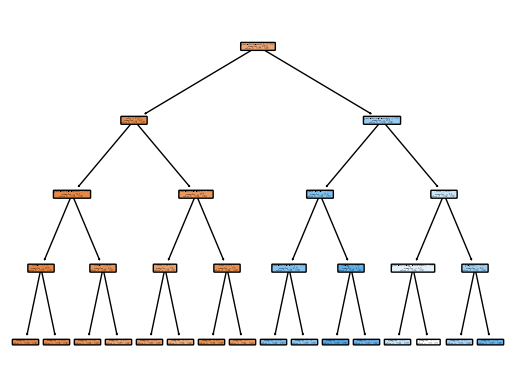

In [21]:
# Plot full tree
plot_tree(
    dt_estimator,
    max_depth=None,
    feature_names=feature_names,
)
# plt.savefig("full_tree_final_2.pdf", dpi=300, bbox_inches='tight')

In [22]:
node_ids_to_include = get_node_ids_along_path(dt_estimator, 'lll')
node_ids_to_include += get_node_ids_along_path(dt_estimator, 'rll')

print(node_ids_to_include)

[0, 1, 2, 3, 0, 16, 17, 18]


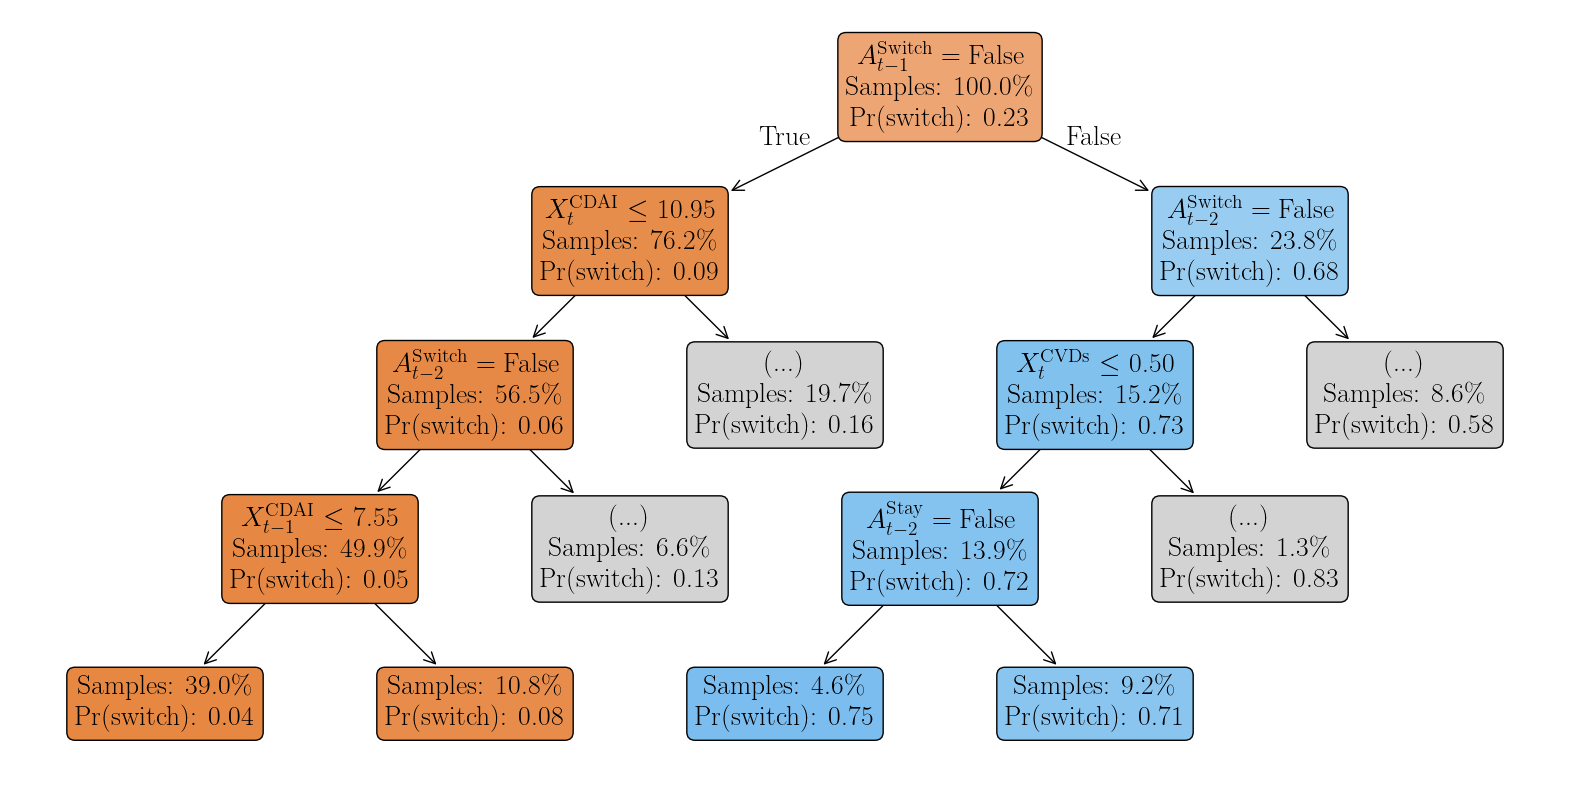

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(
    dt_estimator,
    max_depth=None,
    feature_names=feature_names,
    precision=2,
    ax=ax,
    node_ids_to_include=node_ids_to_include,
    label_mapper=label_mapper,
    formatter=label_formatter,
    annotate_arrows=True,
    fontsize=20
)

### LR

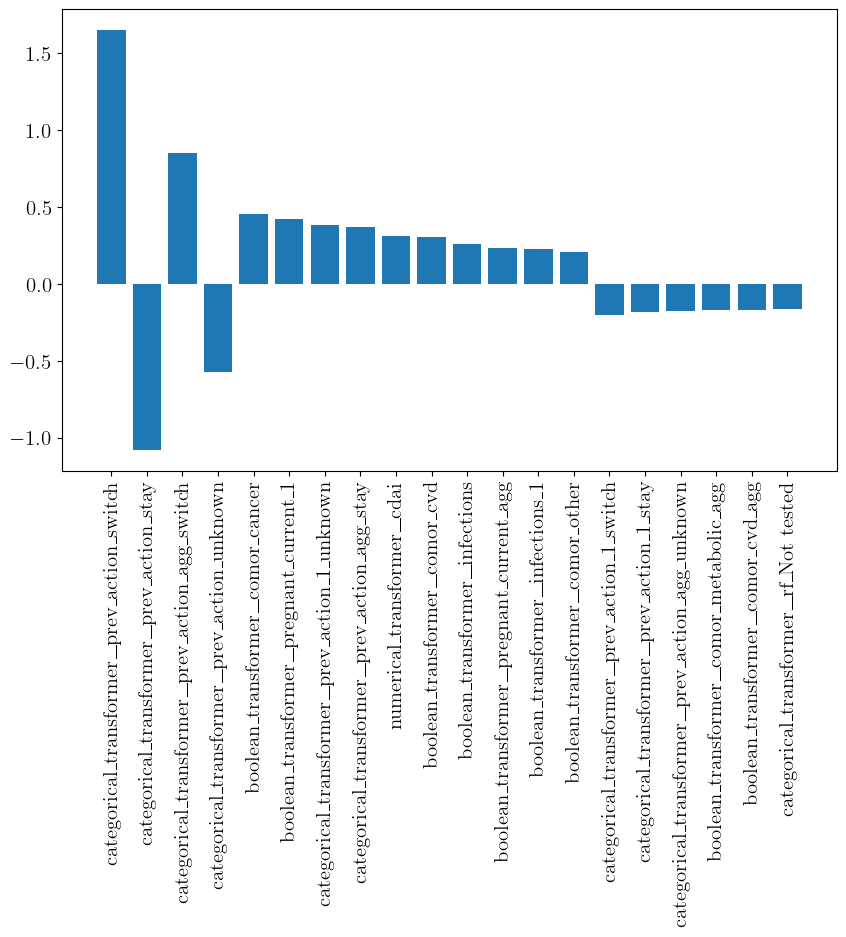

In [24]:
lr = load_best_pipeline(join(switch_results_path, experiment_path1), 5, 'lr')
lr_preprocessor, lr_estimator = lr.named_steps.values()

coefficients = lr[-1].coef_[0]
feature_names = lr[:-1].get_feature_names_out()

largest_indices = np.argsort(np.abs(coefficients))[::-1]
largest_indices = largest_indices[:20]

plt.figure(figsize=(10, 6))
plt.bar(feature_names[largest_indices], coefficients[largest_indices])
plt.xticks(rotation=90)
plt.show()

In [25]:
lr_estimator.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 0.09999999999999999,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': 1627455434,
 'solver': 'lbfgs',
 'max_iter': 2000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 110,
 'classes_': array([0, 1]),
 'n_iter_': array([331], dtype=int32),
 'coef_': array([[-0.04029002, -0.01357563, -0.03222924,  0.07307172, -0.05854363,
         -0.00915068, -0.00807676, -0.00317436, -0.05704494, -0.03482099,
         -0.02970325,  0.03732874,  0.02142892,  0.05535373,  0.01474866,
          0.3108057 , -0.00660446, -0.05785295,  0.02531743, -0.00246841,
          0.03734978,  0.01374176, -0.0193649 ,  0.04585664, -0.01030099,
         -0.01490579,  0.01285106,  0.08046246,  0.05660977, -0.14048395,
          0.0474603 ,  0.00573076, -0.00575288, -0.05290462,  0.0340723 ,
          0.06113596,  0.02058182, -0.12515034, -0.01076736,  0.0146

In [26]:
# Negative features
feature_names = feature_names[largest_indices]
coef = coefficients[largest_indices]

neg_idx = np.where(coef<0)[0]
neg_feature = feature_names[neg_idx]
print(neg_feature)
print(coef[neg_idx])

['categorical_transformer__prev_action_stay'
 'categorical_transformer__prev_action_unknown'
 'categorical_transformer__prev_action_1_switch'
 'categorical_transformer__prev_action_1_stay'
 'categorical_transformer__prev_action_agg_unknown'
 'boolean_transformer__comor_metabolic_agg'
 'boolean_transformer__comor_cvd_agg'
 'categorical_transformer__rf_Not tested']
[-1.08306301 -0.57096268 -0.20218013 -0.18564663 -0.17920477 -0.17120237
 -0.16731754 -0.16465314]


In [27]:
# Positive features
pos_idx = np.where(coef>0)[0]
pos_feature = feature_names[pos_idx]
print(pos_feature)
print(coef[pos_idx])

['categorical_transformer__prev_action_switch'
 'categorical_transformer__prev_action_agg_switch'
 'boolean_transformer__comor_cancer'
 'boolean_transformer__pregnant_current_1'
 'categorical_transformer__prev_action_1_unknown'
 'categorical_transformer__prev_action_agg_stay'
 'numerical_transformer__cdai' 'boolean_transformer__comor_cvd'
 'boolean_transformer__infections'
 'boolean_transformer__pregnant_current_agg'
 'boolean_transformer__infections_1' 'boolean_transformer__comor_other ']
[1.64855924 0.85352062 0.45354789 0.42099206 0.38236031 0.37172341
 0.3108057  0.30592375 0.26156921 0.23416779 0.22829263 0.20782274]


### Prototype model

In [28]:
# prosenet_pipeline = load_best_pipeline(join(switch_results_path, experiment_path2), trial=1, estimator_name='prosenet')

In [29]:
# prosenet_preprocessor, prosenet = prosenet_pipeline.named_steps.values()

In [30]:
prosenet_pipelines = load_experiment_pipeline(join(switch_results_path, experiment_path2), estimator_name = 'prosenet', trial = 2)

In [31]:
prosenet_preprocessor, prosenet = prosenet_pipelines['prosenet_07'].named_steps.values()

In [32]:
config_path = join(prosenet.results_path, 'config.yaml')
config_path

'/mimer/NOBACKUP/groups/oovgen/inpole/results/switch/20240326_1513_sweep/sweep/trial_02/prosenet_07/config.yaml'

In [33]:
config_path = '/mimer/NOBACKUP/groups/inpole/results/switch/20240326_1513_sweep/sweep/trial_02/prosenet_07/config.yaml'
config = load_config(config_path)
data_handler = get_data_handler_from_config(config)
X, y = data_handler.get_splits()[0]
if not expects_groups(prosenet): 
    X = X.drop(columns='id')
Xt = prosenet_preprocessor.transform(X)

In [34]:
_, _, encodings = prosenet.forward(Xt, training=False)

In [35]:
last_history = prosenet.history[-1]
prototype_indices = last_history['prototype_indices']

In [36]:
# For each prototype, find the 9 closest sequences
prototypes = encodings[prototype_indices]
distances = euclidean_distances(encodings, prototypes)
closest_sequences = {prototype_idx: [] for prototype_idx in prototype_indices}
for i, prototype_idx in enumerate(prototype_indices):
    distances_to_prototype = distances[:, i]
    closest_indices = np.argsort(distances_to_prototype)[:10]
    closest_sequences[prototype_idx] = closest_indices

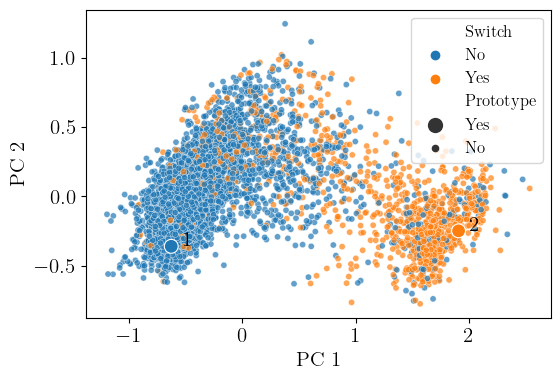

In [37]:
_fig, _ax = visualize_encodings(encodings, prototype_indices, frac=0.04,hue=y, hue_key='Switch')
# _fig.savefig("encoding_prosenet_0405.pdf", dpi=300, bbox_inches='tight')

In [38]:
data_path = '/mimer/NOBACKUP/groups/inpole/data/ra_data.pkl'
data = pd.read_pickle(data_path)
data = data.loc[X.index]
data.reset_index(inplace=True)

/local/tmp.2199065/ipykernel_261922/863570831.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.reset_index(inplace=True)


In [39]:
comor_metabolic = [
    'comor_hld',
    'comor_diabetes',
]
comor_cardiovascular = [
    'comor_htn_hosp',
    'comor_htn',
    'comor_revasc',
    'comor_ven_arrhythm',
    'comor_mi',
    'comor_acs',
    'comor_unstab_ang',
    'comor_cor_art_dis',
    'comor_chf_hosp',
    'comor_chf_nohosp',
    'comor_stroke',
    'comor_tia',
    'comor_card_arrest',
    'comor_oth_clot',
    'comor_pulm_emb',
    'comor_pef_art_dis',
    'comor_pat_event',
    'comor_urg_par',
    'comor_pi',
    'comor_carotid',
    'comor_other_cv',
]
comor_respiratory = [
    'comor_copd',
    'comor_asthma',
    'comor_fib',
]
comor_dil = [
    'comor_drug_ind_sle',
]
comor_cancer = [
    'comor_bc',
    'comor_lc',
    'comor_lymphoma',
    'comor_skin_cancer_squa',
    'comor_skin_cancer_mel',
    'comor_oth_cancer',
]
comor_gi_liver = [
    'comor_ulcer',
    'comor_bowel_perf',
    'comor_hepatic_wbiop',
    'comor_hepatic_nobiop',
]
comor_musculoskeletal = [
    'sec_sjog',  # 0: No, 1: Yes, 2: New
    'jt_deform',  # 0: No, 1: Yes, 2: New
]
comor_other = [
    'comor_psoriasis',
    'comor_depression',
    'comor_fm',
    'comor_oth_neuro',
    'comor_hemorg_hosp',
    'comor_hemorg_nohosp',
    'comor_oth_cond',
]
comorbidities = comor_metabolic+comor_cardiovascular+comor_respiratory+comor_dil+comor_cancer+comor_gi_liver+comor_musculoskeletal+comor_other

In [40]:
targeted_adverse_events = [
    'comor_htn_hosp',  # hypertension (serious)
    'comor_revasc',  # CABG or angioplasty
    'comor_ven_arrhythm',  # ventricular arrhythmia
    'comor_mi',  # myocardial infarction
    'comor_acs',  # acute coronary syndrome
    'comor_unstab_ang',  # unstable angina
    'comor_chf_hosp',  # congestive heart failure (serious)
    'comor_stroke',  # stroke
    'comor_tia',  # transient ischemic attack
    'comor_oth_clot',  # deep vein thrombosis
    'comor_pulm_emb',  # pulmonary embolism
    'comor_pat_event',  # peripheral arterial thromboembolic event
    'comor_urg_par',  # urgent peripheral arterial revascularization
    'comor_pi',  # peripheral ischemia or gangrene
    'comor_bc',  # breast cancer
    'comor_lc',  # lung cancer
    'comor_lymphoma',  # lymphoma
    'comor_skin_cancer_squa',  # non-melanoma skin cancer (basal or squamous cell)
    'comor_skin_cancer_mel',  # melanoma skin cancer
    'comor_oth_cancer',  # other malignancy
    'comor_bowel_perf',  # GI perforation
    'comor_hepatic_wbiop',  # hepatic event requiring biopsy (serious)
    'comor_hemorg_hosp',  # hemorrhage (serious)
]

infections = [
    'hospinf',
    'ivinf',
]

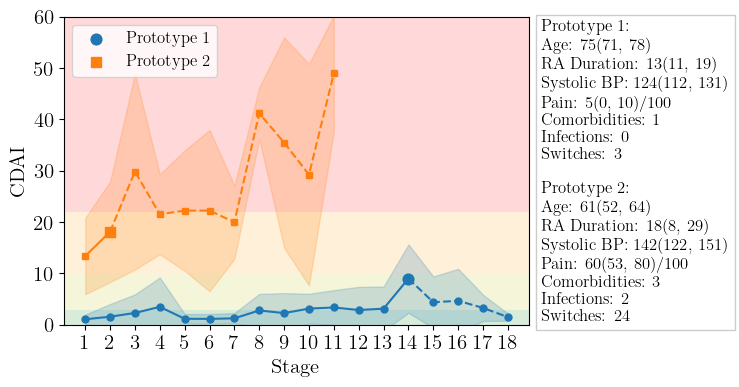

In [41]:
fig = visualize_prototype_ra(data, prototype_indices, closest_sequences, comorbidities = comorbidities, 
                             targeted_adverse_events = targeted_adverse_events, infections = infections) 
# fig.savefig("prototype_visualization_0405.pdf", dpi=300, bbox_inches='tight')